# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
# Setting variables for Bitcoin and Ethereum
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc = requests.get(btc_url).json()
# Fetch current ETH price
# YOUR CODE HERE!
response_eth = requests.get(eth_url).json()
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * (response_btc['data']['1']['quotes']['USD']['price'])
my_eth_value = my_eth * (response_eth['data']['1027']['quotes']['USD']['price'])


# value of my bitcoin and ethereum
my_eth_value
my_btc_value

23048.303999999996

In [6]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23048.30
The current value of your 5.3 ETH is $6887.67


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [36]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [37]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [111]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2017-10-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-03", tz="America/New_York").isoformat()
current_date = pd.Timestamp("2022-10-03", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get 5 year closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = alpaca_api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Get Current Day Only View
df_current_date = alpaca_api.get_bars(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
).df

df_current_date.head()
# df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-03 04:00:00+00:00,96.89,97.48,96.64,96.91,9400979,35829,97.038827,AGG
2022-10-03 04:00:00+00:00,361.12,368.55,359.21,366.61,89052594,617784,364.702960,SPY


In [112]:
# # Reorganize the DataFrame for 5-Years
# # Separate ticker data
# # YOUR CODE HERE!
# AGG_five_year = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
# SPY_five_year = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# # Reorganize the DataFrame for Current Date
# Separate ticker data
AGG_current_date = df_current_date[df_current_date["symbol"]=="AGG"].drop("symbol", axis=1)
SPY_current_date = df_current_date[df_current_date["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames 5-Years
# YOUR CODE HERE!
# df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Concatenate the ticker DataFrames for Current Date
df_current_date = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
# YOUR CODE HERE
# df_ticker.head()
df_current_date.tail()

AGG                                    \
                            open     high     low  close    volume   
timestamp                                                            
2022-09-27 04:00:00+00:00  95.96  96.0750  95.375  95.54  11400353   
2022-09-28 04:00:00+00:00  96.47  97.1277  96.270  97.08  10530370   
2022-09-29 04:00:00+00:00  96.48  96.7999  96.290  96.57   8133673   
2022-09-30 04:00:00+00:00  96.86  97.0900  96.190  96.34  14356507   
2022-10-03 04:00:00+00:00  96.89  97.4800  96.640  96.91   9400979   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-09-27 04:00:00+00:00       35134  95.649073  368.01  370.40  360.87   
2022-09-28 04:00:00+00:00       38055  96.834989  364.44  372.30  362.60   
2022-09-29 04:00:00+00:00       33252  96.544743  366.72  367.11  359.70   
2022-09-30 04:00:00+00:00       43323  96.572541  361.93  365.91  357.04   
2022-10-03 04:00:00+00:00       35829  97.038827  361.12  368.55  359.21   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-09-27 04:00:00+00:00  363.38  105884493      771522  364.580711  
2022-09-28 04:00:00+00:00  370.53  109578062      704940  367.937105  
2022-09-29 04:00:00+00:00  362.79  112068880      789244  362.805405  
2022-09-30 04:00:00+00:00  357.18  152567865      847859  360.660373  
2022-10-03 04:00:00+00:00  366.61   89052594      617784  364.702960

In [114]:
# Create Empty DataFrame for Close Prices
# agg_close_price = pd.DataFrame()
# spy_close_price = pd.DataFrame()

# Pick AGG and SPY close prices
agg_close_price = df_current_date["AGG"]["close"][-1]
spy_close_price = df_current_date["SPY"]["close"][-1]

# Drop the Time Component of the Date
# agg_close_price.index = df_close_price.index.date
# spy_close_price.index = df_close_price.index.date

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.91
Current SPY closing price: $366.61


In [115]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18330.50
The current value of your 200 AGG shares is $19382.00


### Savings Health Analysis

In [136]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
# YOUR CODE HERE!
amount='Amount'
df_savings = pd.DataFrame(data=[my_crypto_value, my_shares_value], index=['my_crypto_value', 'my_shares_value'], columns=[amount])

# Display savings DataFrame
display(df_savings)

,Amount
my_crypto_value,29935.972
my_shares_value,37712.500


<AxesSubplot:ylabel='Amount'>

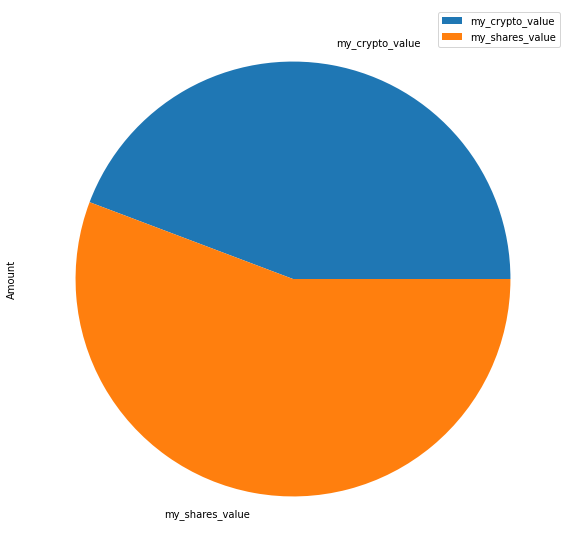

In [138]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y=amount, figsize=(10,10))

In [146]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings = df_savings[amount].sum()
savings_needed = emergency_fund - savings
# Validate saving health
# YOUR CODE HERE!

if savings > emergency_fund:
    print('Congratulations! You have above three month income in your emergency fund!')
elif savings == emergency_fund:
    print('Congratulations! You have the exactly a 3 months income in your emergency fund!')
else:
    print(f'Warning! You need ${savings_needed} more to reach the savings goal of three months.')

Congratulations! You have above three month income in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [151]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-03', tz='America/New_York').isoformat()

In [160]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
spy_agg_df = alpaca_api.get_bars(
    tickers, 
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
agg_df = spy_agg_df[spy_agg_df["symbol"]=="AGG"].drop("symbol", axis=1)
spy_df = spy_agg_df[spy_agg_df["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
shares_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
shares_df.head()



AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-10-03 04:00:00+00:00  109.46  109.54  109.4000  109.52  2462485   
2017-10-04 04:00:00+00:00  109.56  109.57  109.4100  109.49  2673151   
2017-10-05 04:00:00+00:00  109.54  109.54  109.3701  109.44  1909925   
2017-10-06 04:00:00+00:00  109.22  109.42  109.1499  109.28  1823984   
2017-10-09 04:00:00+00:00  109.35  109.43  109.3000  109.43  1131600   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-10-03 04:00:00+00:00       12428  109.492033  252.48  252.8900  252.230   
2017-10-04 04:00:00+00:00        9641  109.495974  252.72  253.4400  252.560   
2017-10-05 04:00:00+00:00        9909  109.444077  253.54  254.6800  253.196   
2017-10-06 04:00:00+00:00        8688  109.303491  254.16  254.7008  253.850   
2017-10-09 04:00:00+00:00        6721  109.380496  254.65  254.7000  253.650   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-10-03 04:00:00+00:00  252.86  66650169      147208  252.585149  
2017-10-04 04:00:00+00:00  253.16  55953619      136448  253.025019  
2017-10-05 04:00:00+00:00  254.66  63522757      195996  254.224339  
2017-10-06 04:00:00+00:00  254.37  80645998      186516  254.301326  
2017-10-09 04:00:00+00:00  253.95  35803138      113893  254.099236

In [163]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
get_MCSimulation = MCSimulation(portfolio_data = shares_df,
                                weights = [.40, .60],
                                num_simulation = 500,
                                num_trading_days = 252*30)


In [164]:
# Printing the simulation input data
# YOUR CODE HERE!
get_MCSimulation.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-10-03 04:00:00+00:00  109.46  109.54  109.4000  109.52  2462485   
2017-10-04 04:00:00+00:00  109.56  109.57  109.4100  109.49  2673151   
2017-10-05 04:00:00+00:00  109.54  109.54  109.3701  109.44  1909925   
2017-10-06 04:00:00+00:00  109.22  109.42  109.1499  109.28  1823984   
2017-10-09 04:00:00+00:00  109.35  109.43  109.3000  109.43  1131600   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-03 04:00:00+00:00       12428  109.492033          NaN  252.48   
2017-10-04 04:00:00+00:00        9641  109.495974    -0.000274  252.72   
2017-10-05 04:00:00+00:00        9909  109.444077    -0.000457  253.54   
2017-10-06 04:00:00+00:00        8688  109.303491    -0.001462  254.16   
2017-10-09 04:00:00+00:00        6721  109.380496     0.001373  254.65   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-10-03 04:00:00+00:00  252.8900  252.230  252.86  66650169      147208   
2017-10-04 04:00:00+00:00  253.4400  252.560  253.16  55953619      136448   
2017-10-05 04:00:00+00:00  254.6800  253.196  254.66  63522757      195996   
2017-10-06 04:00:00+00:00  254.7008  253.850  254.37  80645998      186516   
2017-10-09 04:00:00+00:00  254.7000  253.650  253.95  35803138      113893   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-03 04:00:00+00:00  252.585149          NaN  
2017-10-04 04:00:00+00:00  253.025019     0.001186  
2017-10-05 04:00:00+00:00  254.224339     0.005925  
2017-10-06 04:00:00+00:00  254.301326    -0.001139  
2017-10-09 04:00:00+00:00  254.099236    -0.001651

In [165]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
get_MCSimulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\velez\FinTech_Bootcamp\API_Financial_Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990299,0.999958,0.990879,0.995332,1.006473,0.995162,1.001979,0.981190,0.992951,1.001682,...,1.001592,0.992762,1.006855,1.007618,1.007493,0.998269,1.001410,1.006883,0.988689,1.017955
2,0.998522,0.999469,0.995706,1.012221,1.002042,0.986110,1.013742,0.984354,1.002121,1.008411,...,0.998154,0.994370,1.022776,1.004341,1.014245,0.994116,0.996520,1.017680,0.993930,1.004473
3,1.017058,0.999821,1.020864,1.006100,1.016837,0.985205,1.015130,0.986108,1.004695,1.015970,...,1.003091,0.979062,1.022848,0.998187,1.015880,0.988476,0.995152,1.012383,1.003455,0.995526
4,1.008128,1.001900,1.012464,1.010658,1.012099,0.966401,1.020956,0.985348,1.014388,1.012141,...,1.013325,0.970255,1.024190,1.015759,1.019352,0.984007,0.993288,1.011664,1.008433,1.001817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.404638,32.541795,3.818498,3.644291,1.678022,0.688593,0.873926,3.258743,1.763201,4.712715,...,1.894981,2.204114,3.568237,5.554417,6.734396,4.256841,3.187797,2.832469,4.145603,4.494476
7557,5.375177,32.596039,3.836908,3.629340,1.668416,0.681321,0.864708,3.269368,1.762247,4.705267,...,1.908008,2.186336,3.609523,5.545839,6.796795,4.254685,3.219926,2.814481,4.175890,4.506141
7558,5.349443,32.663315,3.834984,3.663770,1.671539,0.689232,0.869173,3.288167,1.763542,4.750027,...,1.897229,2.209325,3.604778,5.520408,6.726879,4.241458,3.221006,2.782285,4.172554,4.502908
7559,5.381782,32.638921,3.857079,3.624004,1.676207,0.684239,0.864220,3.301117,1.753629,4.759992,...,1.906238,2.208572,3.594489,5.507750,6.732383,4.167539,3.199922,2.790590,4.151879,4.507638


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

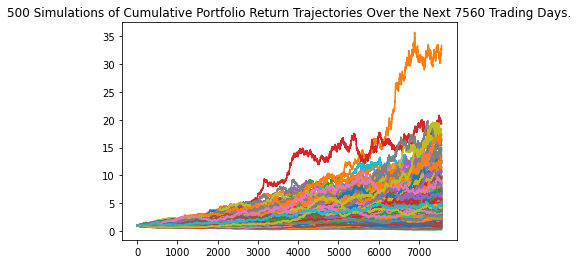

In [166]:
# Plot simulation outcomes
# YOUR CODE HERE!
get_MCSimulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

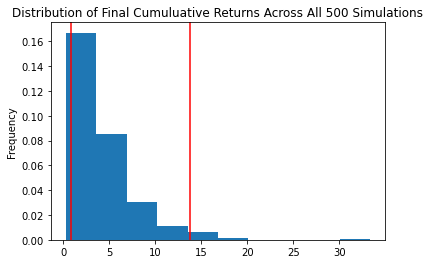

In [167]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
get_MCSimulation.plot_distribution()

### Retirement Analysis

In [168]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_stats = get_MCSimulation.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

count           500.000000
mean              4.323733
std               3.499838
min               0.272615
25%               2.056877
50%               3.276550
75%               5.362570
max              33.344854
95% CI Lower      0.864292
95% CI Upper     13.770577
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [170]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17285.85 and $275411.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [171]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $25928.77 and $413117.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")